## assesment 3 statistical stuff

In [2]:
# setup

#import required/useful libraries
import nltk
import pandas as pd
import matplotlib
import numpy as np
import urllib.request

print('finished processing import statements')


#Read in data
prefix = "https://raw.githubusercontent.com/annajordanous/COMP6481-8481/main/"
suffix = ".pdf.txt"
samples = ["instb", "unitb", "instw", "unitw"]
b_env = ["TheUniversityofBirmingham", "TheUniversityofSheffield", "UniversityofNottingham,The", 
         "TheUniversityofLancaster", "UniversityofBristol", "UniversityofSouthampton", 
         "TheUniversityofManchester", "UniversityofDundee", "UniversityofYork"]
w_env = ["AstonUniversity", "BirkbeckCollege", "LiverpoolJohnMooresUniversity",
         "ManchesterMetropolitanUniversity", "NottinghamTrentUniversity", "TheUniversityofHuddersfield",
         "TheUniversityofWestLondon", "UniversityofEastLondon", "UniversityofStirling"]
k_env = ["TheUniversityofKent"]
instb = {}
instw = {}
instk = {}
unitb = {}
unitw = {}
unitk = {}

def readURL(filename):
    # open a connection to a URL using urllib
    webUrl  = urllib.request.urlopen(filename)
    # read the data from the URL and print it
    data = webUrl.read()
    return data
    
def readFiles(x, tag):
    itag = "inst"+tag
    filenameI = prefix+itag+"/"+itag+x+suffix
    utag = "unit"+tag
    filenameU = prefix+utag+"/"+utag+x+"-11"+suffix
    dataI = str(readURL(filenameI))
    dataU = str(readURL(filenameU))
    return(dataI, dataU)

print("finished setting up variables and functions for data readin")


# this cell may take some time to run

# read in textual data 
for x in b_env:
    (instb[x], unitb[x]) = readFiles(x, "b")
    
for x in w_env:
    (instw[x], unitw[x]) = readFiles(x, "w")

for x in k_env:
    (instk[x], unitk[x]) = readFiles(x, "k")
    
print("Finished reading in textual data")

finished processing import statements
finished setting up variables and functions for data readin
Finished reading in textual data


In [3]:
from nltk.probability import FreqDist
# please add your code for Q1 here (double click to edit)
def createLrForUni(text):
    tokens = nltk.word_tokenize(text)
    lexicalRichness = len(set(tokens))/len(tokens)

    freqDist = FreqDist(tokens)
    totalTokens = freqDist.N()
    averageTokenFreq = totalTokens / len(freqDist)

    return [lexicalRichness, averageTokenFreq]

lr_unit = {}
lr_inst = {}

for x in b_env:
    lr_unit[x] = createLrForUni(unitb[x])
    lr_inst[x] = createLrForUni(instb[x])
for x in w_env:
    lr_unit[x] = createLrForUni(unitw[x])
    lr_inst[x] = createLrForUni(instw[x])
for x in k_env:
    lr_unit[x] = createLrForUni(unitk[x])
    lr_inst[x] = createLrForUni(instk[x])

In [4]:
# please add your code for Q2 here (double click to edit)
import pandas as pd
lr_unit_df = pd.DataFrame(lr_unit).transpose()
lr_inst_df = pd.DataFrame(lr_inst).transpose()

                                         0         1
TheUniversityofBirmingham         0.264135  3.785949
TheUniversityofSheffield          0.271202  3.687294
UniversityofNottingham,The        0.259092  3.859633
TheUniversityofLancaster          0.259482  3.853825
UniversityofBristol               0.285317  3.504867
UniversityofSouthampton           0.254361  3.931427
TheUniversityofManchester         0.287239  3.481426
UniversityofDundee                0.326582  3.062016
UniversityofYork                  0.240854  4.151889
AstonUniversity                   0.267955  3.731976
BirkbeckCollege                   0.271969  3.676885
LiverpoolJohnMooresUniversity     0.233171  4.288700
ManchesterMetropolitanUniversity  0.262733  3.806149
NottinghamTrentUniversity         0.280643  3.563245
TheUniversityofHuddersfield       0.267494  3.738400
TheUniversityofWestLondon         0.269312  3.713163
UniversityofEastLondon            0.317659  3.148031
UniversityofStirling              0.282280  3.

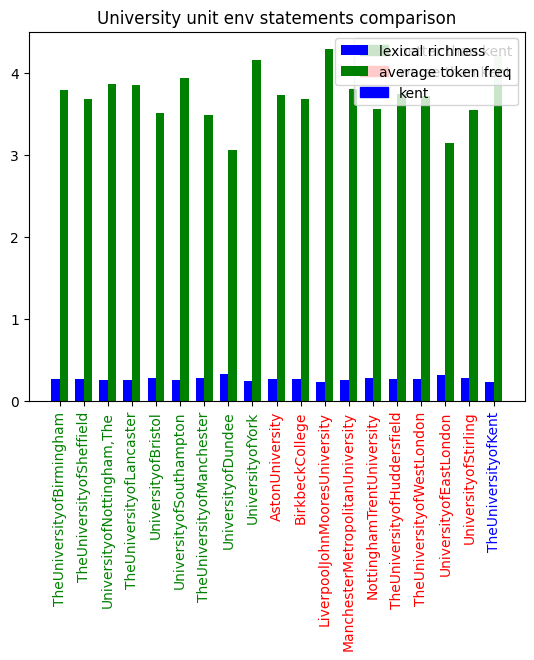

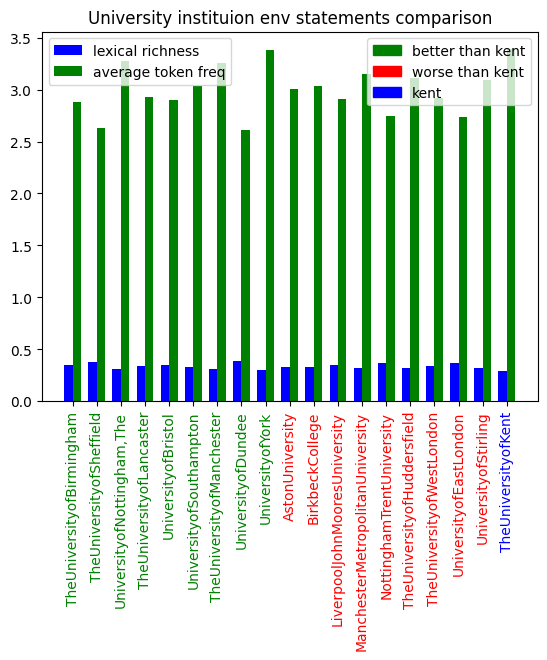

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def createBarChart(frame, summary_type):
    lr_df = frame
    lr_df.columns=['LR', 'ATF']

    # Set the x axis ticks
    r = np.arange(len(lr_df.index))
    # Set barwidth
    barWidth = 0.35

    # Create the grouped bar chart
    fig, ax = plt.subplots()
    rects1 = ax.bar(r, lr_df["LR"], color="b", width=barWidth, label="lexical richness")
    rects2 = ax.bar(r + barWidth, lr_df["ATF"], color="g", width=barWidth, label="average token freq")

    # Add x-axis ticks and labels
    ax.set_xticks(r + barWidth / 2)
    ax.set_xticklabels(lr_df.index, rotation=90)
    xticklabels = ax.set_xticklabels(lr_df.index, rotation=90)

    for i, label in enumerate(xticklabels):
        if b_env.count(label.get_text()) == 1:
            label.set_color('g')
        elif w_env.count(label.get_text()) == 1:
            label.set_color('r')
        elif k_env.count(label.get_text()) == 1:
            label.set_color('b')
            
    # Add legend for label colors
    blue_patch = mpatches.Patch(color='g', label='better than kent')
    green_patch = mpatches.Patch(color='r', label='worse than kent')
    red_patch = mpatches.Patch(color='b', label='kent')
    label_legend = ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')

    # Add the label legend to the plot
    plt.gca().add_artist(label_legend)

    # Add plot title
    plt.title(f"University {summary_type} env statements comparison")

    # Add plot legend
    ax.legend()
      
    # show the plot
    plt.show()

print(lr_unit_df)
print(lr_inst_df)
createBarChart(lr_unit_df, "unit")
createBarChart(lr_inst_df, "instituion")